## 决策树回归

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

boston = datasets.load_boston()
x = boston.data
y = boston.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=233)

In [3]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [4]:
reg.score(x_test,y_test)

0.7410680140563546

In [5]:
reg.score(x_train,y_train)

1.0

## 绘制学习曲线

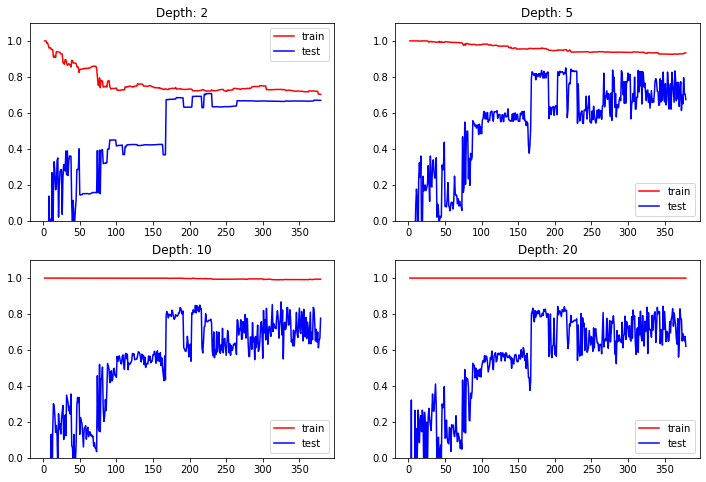

In [6]:
from sklearn.metrics import r2_score

plt.rcParams["figure.figsize"] = (12, 8)
max_depth = [2, 5, 10, 20]
    
for i, depth in enumerate(max_depth):
    
    reg = DecisionTreeRegressor(max_depth=depth)
    train_error, test_error = [], []
    for k in range(len(x_train)):
        reg.fit(x_train[:k+1], y_train[:k+1])
        
        y_train_pred = reg.predict(x_train[:k + 1])
        train_error.append(r2_score(y_train[:k + 1], y_train_pred))
        
        y_test_pred = reg.predict(x_test)
        test_error.append(r2_score(y_test, y_test_pred))
    
    plt.subplot(2, 2, i + 1)
    plt.ylim(0, 1.1)
    plt.title("Depth: {0}".format(depth))
    plt.plot([k + 1 for k in range(len(x_train))], train_error, color = "red", label = 'train')
    plt.plot([k + 1 for k in range(len(x_train))], test_error, color = "blue", label = 'test')
    plt.legend()

plt.show()

## 网格搜索

In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [n for n in range(2, 15)],
    'min_samples_leaf': [sn for sn in range(3, 20)],
}

grid = GridSearchCV(
    estimator = DecisionTreeRegressor(), 
    param_grid = params, 
    n_jobs = -1
)

In [8]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                              13, 14, 15, 16, 17, 18, 19]})

In [9]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 3}

In [10]:
grid.best_score_

0.7327442904059717

In [11]:
reg = grid.best_estimator_

In [12]:
reg.score(x_test, y_test)

0.781690085676063